# Simulations - CI converage and length

In [1]:
# 0.1, 1, 10
tuning_param = 1

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pandas as pd
import scipy

In [3]:
def coverage_plot(E, SE, alpha_list,  title_text):
    sns.set(rc={'figure.figsize':(8,8)})
    sns.set_style("white")
    
    # marker size
    marks = 17
    
    # color list
    clist = ['darkblue', 'green', 'darkviolet' , 'teal']
        
    data = np.concatenate((1- alpha_list.reshape(-1,1), E), axis = 1)
    df = pd.DataFrame(data, columns = ['alpha','ols','olee','con','W'])
    
    sns.lineplot( data = df, x= 'alpha', y= 'alpha', label = 'Target Coverage',  \
                 color = 'black', alpha = 0.8, linewidth=1.5, linestyle='dashed')
    
    sns.lineplot(data = df, x= 'alpha', y= 'ols', color = clist[0], label = 'OLS', marker = '>',\
                 markersize=marks, linestyle='dashed')
    plt.errorbar(x= data[:,0], y=  E[:,0] , yerr = SE[:,0], color = clist[0],  capsize = 3)
    
    
    sns.lineplot(data = df, x= 'alpha', y= 'olee', color = clist[1], label = 'ALEE', marker = 'o', markersize=marks, \
                 linestyle='dashed')
    plt.errorbar(x= data[:,0], y=  E[:,1] , yerr = SE[:,1], color = clist[1],  capsize = 3)
    
    
    sns.lineplot(data = df, x= 'alpha', y= 'con', color = clist[2], label = 'Concentration', marker = '<', markersize=marks, \
                 linestyle='dashed')
    plt.errorbar(x= data[:,0], y=  E[:,2] , yerr = SE[:,2], color = clist[2],  capsize = 3)
    
    
    sns.lineplot(data = df, x= 'alpha', y= 'W', color = clist[3], label = 'W-decorrelation', marker = '*', markersize=marks + 4, \
                 linestyle='dashed')
    plt.errorbar(x= data[:,0], y=  E[:,3] , yerr = SE[:,3], color = clist[3],  capsize = 3)
    
    title_font = 29
    y_pos = 1.02
    
    plt.title(title_text, fontsize = title_font, y = y_pos)
    plt.ylabel('Empirical coverage probability', fontsize= 23)
    plt.xlabel('Target coverage probability', fontsize = 23)
    plt.yticks(np.arange(0.6, 1.05, step=0.1), fontsize = 18)
    plt.xticks(np.arange(0.75, 1, step=0.05), fontsize = 18)
    plt.legend(prop={'size': 21}, loc = 4)
    
    
    
def width_plot(E, SE, alpha_list, title_text, ydelta, width_min = 0.1, width_max = 0.7):
    sns.set(rc={'figure.figsize':(8,8)})
    sns.set_style("white")
    
    # marker size
    marks = 17
    
    # color list
    clist = ['darkblue', 'green', 'darkviolet' , 'teal']
    
    data = np.concatenate((1- alpha_list.reshape(-1,1), E), axis = 1)
    df = pd.DataFrame(data, columns = ['alpha', 'ols','olee','con','W'])
    
    sns.lineplot(data = df, x= 'alpha', y= 'ols', color = clist[0], label = 'OLS', marker = '>', markersize=marks, \
                 linestyle='dashed')
    #plt.errorbar(x= data[:,0], y=  E[:,0] , yerr = SE[:,0], color = errc[0],  capsize = 3)
    
    
    sns.lineplot(data = df, x= 'alpha', y= 'olee',color = clist[1], label = 'ALEE', marker = 'o', markersize=marks, \
                 linestyle='dashed')
    #plt.errorbar(x= data[:,0], y=  E[:,1] , yerr = SE[:,1], color = errc[1],  capsize = 3)
    
    
    sns.lineplot(data = df, x= 'alpha', y= 'con', color = clist[2], label = 'Concentration', marker = '<', markersize=marks, \
                 linestyle='dashed')
    #plt.errorbar(x= data[:,0], y=  E[:,2] , yerr = SE[:,2], color = errc[2],  capsize = 3)
    
    
    sns.lineplot(data = df, x= 'alpha', y= 'W',color = clist[3], label = 'W-decorrelation', marker = '*', markersize=marks + 4, \
                 linestyle='dashed')
    #plt.errorbar(x= data[:,0], y=  E[:,3] , yerr = SE[:,3], color = errc[3],  capsize = 3)
    
    
    y_pos = 1.02
    plt.title(title_text, fontsize = 29, y = y_pos)
    
    height = np.max(E)*1.5
    plt.ylim(0,height)
    
    plt.ylabel('Mean width of CI', fontsize= 23)
    plt.xlabel('Target coverage probability', fontsize = 23)
    plt.xticks(np.arange(0.75, 1, step=0.05), fontsize = 18)
    plt.ylim(ymin=width_min, ymax = width_max)
    plt.yticks(np.arange(width_min, width_max, step= ydelta), fontsize = 18)
    plt.legend(prop={'size': 21}, loc = 2)
     

## Two-armed bandit with $\epsilon$-Greedy algorithm

### non-subGaussian error

In [4]:
# define reward function
def reward():
    # true signal 0.3
    return  0.3 + np.random.poisson(1,1)[0] - 1


# define function for generating predictable weights w_t
def f(x):
    return 1/np.sqrt(x*np.log(np.exp(2)*x)*np.log(np.log(np.exp(2)*x))**2)
        

# define eps Greedy algorithm
def ECB(n):
    rewards_seq = np.array([reward() for i in range(n)])
    x = [0, 1]
    y = [rewards_seq[0], rewards_seq[1]]
    nums = np.array([1 , 1 ])
    rewards = np.array(y)
    
    for i in range(n-2):
        # compute arm means
        arm_means = rewards/nums
        arm = np.argmax(arm_means)
        flag = np.random.uniform(0,1,1)[0]
        # defining decaying rate
        if flag > 1 - np.log(i+1)**0.5/np.sqrt(i+1) and i>50:
            arm = 1 - arm
        x.append(arm)
        newr = rewards_seq[i+2]
        y.append(newr)
        nums[arm] += 1
        rewards[arm] += newr
    # return the noise sequence
    return x, y, rewards_seq - 0.3

In [5]:
# define erros
def scaled_estimators(n, sampler, wlam, alpha_list):
    CI_data = np.zeros((len(alpha_list),12))
    
    x,y,noise = sampler(n)
    X = np.zeros((n,2))

    # construct X
    X[:,0] = (np.array(x) == 0) - 0
    X[:,1] = (np.array(x) == 1) - 0
    # y
    x = np.array(x)
    y = np.array(y)
    
    # compute OLS
    M = LinearRegression( fit_intercept = False).fit(X, y)
    coeff = M.coef_
    
    # estimate std
    y_fit = X@coeff.reshape(-1,1)
    sig_h = np.sqrt(np.mean((y - y_fit.reshape(-1))**2))
    
    coeff = coeff[0]
    Sn = X.T@X
    Sn = Sn[0,0]
    
    
    # standardize errors for ols
    for i in range(len(alpha_list)):
        alpha = alpha_list[i]
        U1 = coeff - sig_h*norm.ppf(alpha)/np.sqrt(Sn)
        L1 = coeff - sig_h*norm.ppf(1-alpha)/np.sqrt(Sn)
        U1 = (U1 >= 0.3) - 0
        L1 = (L1 <= 0.3) - 0
        CI_data[i,0] += U1
        CI_data[i,1] += L1
        CI_data[i,2] += 2*sig_h*norm.ppf(1-alpha/2)/np.sqrt(Sn)
        
    # extract information for the first arm
    ysub = y[np.array(x) == 0]
    noise_sub = noise[np.array(x) == 0]
    n1 = len(ysub)
    
    # define s0
    s0 = np.exp(2)*np.log(n)
    w = []
    
    # compute weights w
    # consider self-scaled version
    for i in range(n1):
        w.append(f(1 + (i+1)/s0)/np.sqrt(s0))
    w = np.array(w)
    
    # equivalent form for standardized residual
    # factor 1/np.sqrt(np.sum(w**2)) is used to stablize the variance
    alee = 1/(np.sum(w))*np.sum(w*ysub)
    for i in range(len(alpha_list)):
        alpha = alpha_list[i]
        alee_delta = sig_h*norm.ppf(alpha)*np.sqrt(np.sum(w**2))/np.sum(w)
        U1 = alee - alee_delta
        L1 = alee + alee_delta
        U1 = (U1 >= 0.3) - 0
        L1 = (L1 <= 0.3) - 0
        CI_data[i,3] += U1
        CI_data[i,4] += L1
        CI_data[i,5] += 2*sig_h*norm.ppf(1 - alpha/2)*np.sqrt(np.sum(w**2))/np.sum(w)
        
    
        
    # self-normalized martingale concentration bound
    # Theorem 1 -abbasi
    for i in range(len(alpha_list)):
        alpha = alpha_list[i]
        
        sum_x1 = np.sum(X[:,0]**2)
        # lam = 0.1, 0.5, 1, 2
        lam = 1
        
        # Theorem 1 from improved bandits
        con_delta = sig_h/sum_x1*np.sqrt( np.log((lam + sum_x1)/(lam*alpha**2))        *(lam + sum_x1 ))
        CI_data[i,8] += 2*con_delta
        
        # one-sided CI
        # modify alpha
        alpha = alpha*2
        con_delta = sig_h/sum_x1*np.sqrt( np.log((lam + sum_x1)/(lam*alpha**2))        *(lam + sum_x1 ))
        
        U1 = coeff + con_delta
        L1 = coeff - con_delta
        U1 = (U1 >= 0.3) - 0
        L1 = (L1 <= 0.3) - 0
        CI_data[i,6] += U1
        CI_data[i,7] += L1
    
        
        
    # W-decorrelation
    Sn = X.T@X
    W_lambdas = np.ones(n)*wlam
    # Latest parameter estimate vector
    wols = M.coef_ ###
    ols = wols.copy()
    # Latest w_t vector
    w = np.zeros((2))
    # Latest matrix WX = w_1 x_1^T + ... + w_t x_t^T
    WX = np.zeros((2,2))
    # Latest vector of marginal variances reward_vars * (w_1**2 + ... + w_t**2)
    wols_var = 0
    for t in range(n):
        # x_t = e_{arm}
        arm = x[t]
        # y_t = reward
        reward = y[t]
        # Update w_t = (1/(norm{x_t}^2+lambda_t)) (x_t - W_{t-1} X_{t-1} x_t)
        np.copyto(w, -WX[:,arm])
        w[arm] += 1
        w /= (1.0+W_lambdas[t])
        wols += w * (reward - ols[arm] ) 
        # Update WX
        WX[:,arm] += w
        # Update marginal variances
        wols_var +=  w[0]**2
        
    
    for i in range(len(alpha_list)):
        alpha = alpha_list[i]
        U1 = wols[0] - sig_h*norm.ppf(alpha)*np.sqrt(wols_var)
        L1 = wols[0] - sig_h*norm.ppf(1 - alpha)*np.sqrt(wols_var)
        U1 = (U1 >= 0.3) - 0
        L1 = (L1 <= 0.3) - 0
        CI_data[i,9] += U1
        CI_data[i,10] += L1
        CI_data[i,11] += 2*sig_h*norm.ppf(1 - alpha/2)*np.sqrt(wols_var)
    
    
    return CI_data
    
#   replication function
def CI_repli(N , n,  f, lam, alpha_list):
    Data = np.zeros((N, len(alpha_list)*12))
    for i in range(N):
        output = scaled_estimators(n,f, lam, alpha_list)
        Data[i,:] = output.reshape(-1)
    al = len(alpha_list)
    Data1 = np.mean(Data, axis = 0).reshape(al, 12)
    Data2 = np.std(Data, axis = 0).reshape(al, 12)
    return Data1, Data2/np.sqrt(N)

In [6]:
def compute_lam(N, n, sampler):
    
    record = np.zeros(N)
    for k in range(N):
        
        x,y,noise = sampler(n)
        X = np.zeros((n,2))

        # construct X
        X[:,0] = (np.array(x) == 0) - 0
        X[:,1] = (np.array(x) == 1) - 0
        
        evalue, evector = np.linalg.eig(X.T@X)
        
        record[k] = evalue[0]
    return np.percentile(record, 10)

In [7]:
np.random.seed(666)
# 1000 replications with n = 1000
lam = compute_lam(1000, 1000, ECB)/np.log(1000)

np.random.seed(666)
Data1, Data2 = CI_repli(1000, 1000, ECB, lam, np.arange(0.05,0.26,0.015))

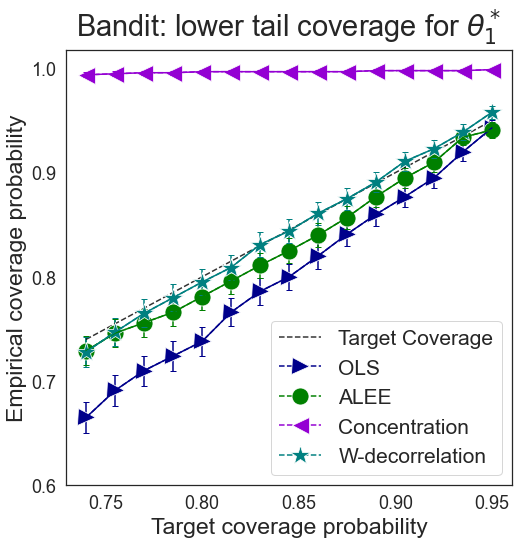

In [8]:
alpha_list = np.arange(0.05,0.26,0.015)
coverage_plot(Data1[:,[0,3,6,9]], Data2[:,[0,3,6,9]] , alpha_list, r'Bandit: lower tail coverage for $\theta_1^*$')
plt.savefig('Two-armed-bandit-lower-tail-poisson.pdf')

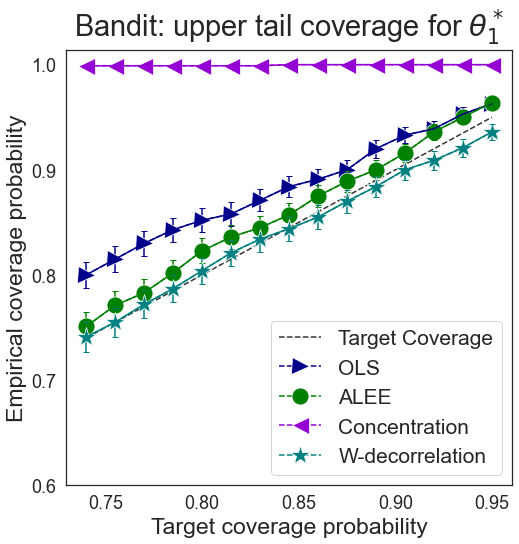

In [9]:
coverage_plot(Data1[:,[1,4,7,10]], Data2[:,[1,4,7,10]], alpha_list, r'Bandit: upper tail coverage for $\theta_1^*$')
plt.savefig('Two-armed-bandit-upper-tail-poisson.pdf')

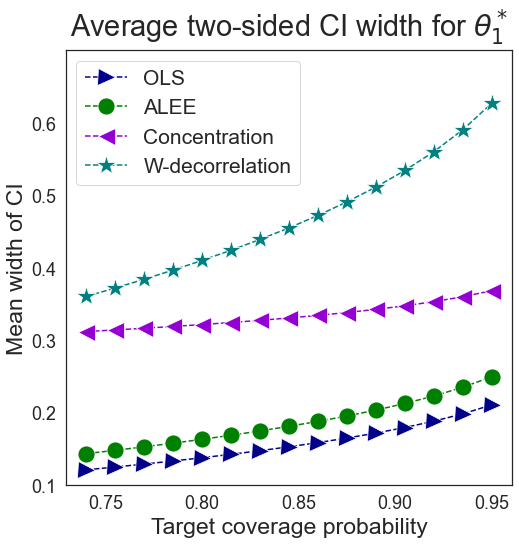

In [10]:
width_plot(Data1[:,[2,5,8,11]], Data2[:,[2,5,8,11]], alpha_list, r'Average two-sided CI width for $\theta_1^*$', 0.1, 0.1, 0.7)
plt.savefig('Two-armed-bandit-width-poisson.pdf')

## AR(1) model

In [11]:
# generate data
def AR(n):
    x = np.zeros(n)
    y = np.zeros(n)
    noise_seq = np.random.poisson(1,n) - 1
    for i in range(n):
        y[i] = x[i] + noise_seq[i]
        if i < n - 1:
            x[i+1] = y[i]
    return x,y,noise_seq

# define weights f1, f2 two version 


def self_ar_estimators(n, wlam, alpha_list):
    
    x,y,noise = AR(n)
    CI_data = np.zeros((len(alpha_list),12))
    X = x.reshape(-1,1)
    
    ######################################
    # compute OLS
    M = LinearRegression( fit_intercept = False).fit(X, y.reshape(-1,1))
    coeff = M.coef_
    coeff = coeff[0]
    ols = coeff.copy()
    Sn = X.T@X
    Sn = Sn.reshape(-1)[0]
    
    sig_h = np.sqrt(np.mean((y - coeff*x)**2))
    
    # standardize errors for ols
    for i in range(len(alpha_list)):
        alpha = alpha_list[i]
        U1 = coeff - sig_h*norm.ppf(alpha)/np.sqrt(Sn)
        L1 = coeff - sig_h*norm.ppf(1-alpha)/np.sqrt(Sn)
        U1 = (U1 >= 1) - 0
        L1 = (L1 <= 1) - 0
        CI_data[i,0] += U1
        CI_data[i,1] += L1
        CI_data[i,2] += 2*sig_h*norm.ppf(1-alpha/2)/np.sqrt(Sn)
    
    ######################################
    # define s0
    
    s0 = np.exp(2)*n/np.log(np.log(n))
    w = []
    # utilize f1 to compute weights w
    for i in range(n):
        w.append(f(1 + np.sum(x[:(i+1),]**2)/s0)*x[i]/np.sqrt(s0))
    w = np.array(w)
    
    # equivalent form for standardized residual
    # factor 1/np.sqrt(np.sum(w**2)) is used to stablize the variance
    alee = np.sum(w*y)/np.sum(w*x)
    for i in range(len(alpha_list)):
        alpha = alpha_list[i]
        U1 = alee - sig_h*norm.ppf(alpha)*np.sqrt(np.sum(w**2))/np.sum(w*x)
        L1 = alee - sig_h*norm.ppf(1 - alpha)*np.sqrt(np.sum(w**2))/np.sum(w*x)
        U1 = (U1 >= 1) - 0
        L1 = (L1 <= 1) - 0
        CI_data[i,3] += U1
        CI_data[i,4] += L1
        CI_data[i,5] += 2*sig_h*norm.ppf(1 - alpha/2)*np.sqrt(np.sum(w**2))/np.sum(w*x)
    
    
    ######################################
    # concentration
    for i in range(len(alpha_list)):
        alpha = alpha_list[i]
        
        sum_x1 = np.sum(X**2)
        lam = 1
        
        # Theorem 1 from improved bandits
        con_delta = sig_h/sum_x1*np.sqrt( np.log((lam + sum_x1)/(lam*alpha**2))     *(lam + sum_x1 ))
        CI_data[i,8] += 2*con_delta
        
        # one-sided CI
        # modify alpha
        alpha = alpha*2
        con_delta = sig_h/sum_x1*np.sqrt( np.log((lam + sum_x1)/(lam*alpha**2))     *(lam + sum_x1 ))
        
        U1 = coeff + con_delta
        L1 = coeff - con_delta
        U1 = (U1 >= 1) - 0
        L1 = (L1 <= 1) - 0
        CI_data[i,6] += U1
        CI_data[i,7] += L1
    
    
    ######################################
    Sn = X.T@X
    W_lambdas = np.ones(n)*wlam
    # Latest parameter estimate vector
    wols = M.coef_ ###
    ols = wols.copy()
    # Latest w_t vector
    w = np.array([0])
    # Latest matrix WX = w_1 x_1^T + ... + w_t x_t^T
    WX = np.array([0])
    # Latest vector of marginal variances reward_vars * (w_1**2 + ... + w_t**2)
    wols_var = 0
    for t in range(n):
        reward = y[t]
        # Update w_t = (1/(norm{x_t}^2+lambda_t)) (x_t - W_{t-1} X_{t-1} x_t)
        np.copyto(w, -WX)
        w  +=  1
        w  = w*x[t]/(1.0+W_lambdas[t])
        # Update beta_t = beta_{t-1} + w_t (y_t - <beta_OLS, x_t>)
        wols += w * (reward - ols*x[t] ) ###
        # Update WX
        WX  = WX +  w*x[t]
        # Update marginal variances
        wols_var +=  w**2
        
    
    for i in range(len(alpha_list)):
        alpha = alpha_list[i]
        U1 = wols[0] - sig_h*norm.ppf(alpha)*np.sqrt(wols_var)
        L1 = wols[0] - sig_h*norm.ppf(1 - alpha)*np.sqrt(wols_var)
        U1 = (U1 >= 1) - 0
        L1 = (L1 <= 1) - 0
        CI_data[i,9] += U1
        CI_data[i,10] += L1
        CI_data[i,11] += 2*sig_h*norm.ppf(1 - alpha/2)*np.sqrt(wols_var)
                                               
    return CI_data
    

def CI_ar_repli(N , n, lam,  alpha_list):
    E = np.zeros((len(alpha_list),12))
    Data = np.zeros((N, len(alpha_list)*12))
    for i in range(N):
        output = self_ar_estimators(n, lam, alpha_list)
        Data[i,:] = output.reshape(-1)
    al = len(alpha_list)
    Data1 = np.mean(Data, axis = 0).reshape(al, 12)
    Data2 = np.std(Data, axis = 0).reshape(al, 12)
    return Data1, Data2/np.sqrt(N)

In [12]:
def compute_ar_lam( N, n, sampler):
    
    record = np.zeros(N)
    
    for k in range(N):
        
        x,y,noise = sampler(n)
        X = x.reshape(-1,1)
        
        record[k] = np.sum(X**2)
    
    return np.percentile(record, 10)


In [ ]:
np.random.seed(666)
# 1000 replications with n = 1000
lam = compute_ar_lam( 1000, 1000, AR)/np.log(1000)

np.random.seed(666)
E1, E2 = CI_ar_repli(1000, 1000, lam, np.arange(0.05,0.26,0.015))

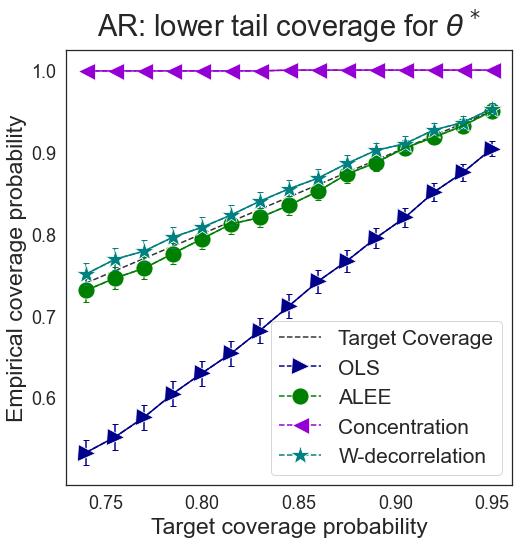

In [14]:
alpha_list = np.arange(0.05,0.26,0.015)
coverage_plot(E1[:,[0,3,6,9]], E2[:,[0,3,6,9]], alpha_list,  r'AR: lower tail coverage for $\theta^*$')
plt.savefig('AR-lower-tail-poisson.pdf')

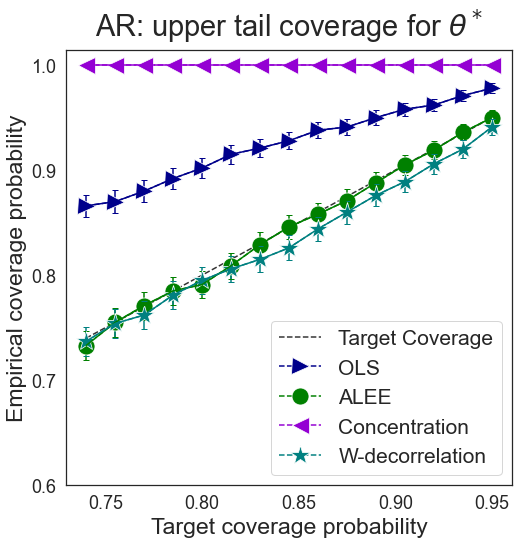

In [15]:
coverage_plot(E1[:,[1,4,7,10]], E2[:,[1,4,7,10]], alpha_list,  r'AR: upper tail coverage for $\theta^*$')
plt.savefig('AR-upper-tail_lam='+ str(tuning_param)+'-nonsubGaussian.pdf')

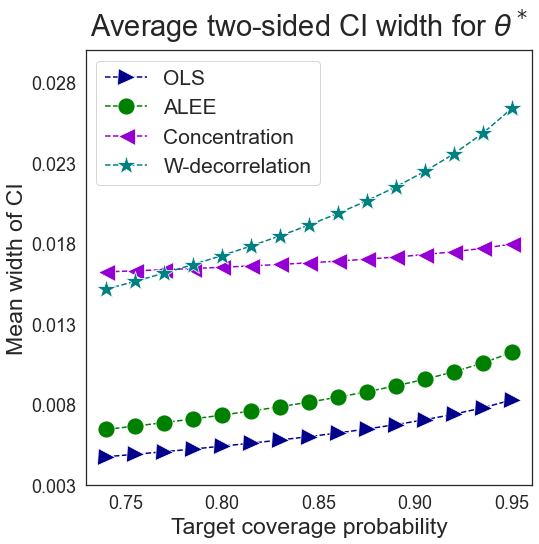

In [16]:
width_plot(E1[:,[2,5,8,11]], E2[:,[2,5,8,11]], alpha_list, r'Average two-sided CI width for $\theta^*$', 0.005, 0.003, 0.03)
plt.savefig('AR-CI-width_lam='+ str(tuning_param)+'-nonsubGaussian.pdf')